# 🍄 Proyecto VIII – Análisis Exploratorio (EDA) del Mushroom Dataset 
**Autor:** Alfonso Bermúdez  
**Bootcamp IA – Proyecto Individual (2025)**

En este notebook se lleva a cabo el **análisis exploratorio de datos (EDA)** sobre el *Mushroom Dataset* del repositorio de la UCI con un enfoque didáctico y visual sobre aprendizaje ML supervisado y no supervisado.

**Dataset original UCI:**
`url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"`

El objetivo es comprender la estructura de los datos del dataset, identificar valores faltantes, preparar las variables categóricas y dejar el conjunto de datos listo para aplicar técnicas de **aprendizaje no supervisado (PCA + K-Means)** y un modelo **supervisado (Random Forest)** para comparación.



## Paso 1: Visualización del dataset original (nombres abreviados) + Descripción inicial del dataset
Antes de renombrar las columnas, se muestra el dataset tal como se obtiene desde la fuente original UCI, desde `../data/agaricus-lepiota.data`, con nombres abreviados.
Esto permite identificar la estructura original y comprender por qué es necesario aplicar nombres descriptivos posteriormente.

Exploramos también: Dimensiones, tipo de variables, valores únicos y si existen valores faltantes representados por él símbolo `'?'` por columna.



In [53]:
# ====================================
# Librerías y configuración general
# ====================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import os
%matplotlib inline

# Original Dataset path from UCI Machine Learning Repository
DATA_PATH = "../data/agaricus-lepiota.data"

# Carga el conjunto de datos (sin cabeceras) en el dataframe de pandas df_original
df_original = pd.read_csv(DATA_PATH, header=None)

# Muestra las primeras filas del dataframe original sin cabeceras
print("Vista previa del dataset ORIGINAL (sin cabeceras):")
display(df_original.head())

# Dimensiones del dataset
print(f"Número de filas: {df_original.shape[0]}, Número de columnas: {df_original.shape[1]}")

# Tipos de datos por columna
print('\nValores únicos por columna :')
print(df_original.nunique().sort_values().head(23))

# Conteo de valores faltantes representados por '?'
missing = (df_original == '?').sum().sort_values(ascending=False)
print('\nConteo de faltantes representados por ? por columna:')
print(missing[missing>0])



Vista previa del dataset ORIGINAL (sin cabeceras):


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Número de filas: 8124, Número de columnas: 23

Valores únicos por columna :
16     1
0      2
6      2
7      2
10     2
8      2
4      2
18     3
12     4
17     4
2      4
13     4
19     5
11     5
1      6
21     6
22     7
5      9
14     9
15     9
20     9
3     10
9     12
dtype: int64

Conteo de faltantes representados por ? por columna:
11    2480
dtype: int64


## Paso 2: Importaciones, configuración visual y renombrado de columnas con nombres oficiales UCI
En esta sección se cargan las librerías necesarias, se configura el estilo visual uniforme (basado en `seaborn`) y se renombran las columnas con nombres oficiales y descriptivos de la especie de hongo según la documentación del dataset UCI para evitar confusiones.


In [54]:

# Configuración estética de gráficos
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams.update({"figure.figsize": (10,4), "axes.titlesize": 14, "axes.titleweight": "bold"})


# Nombres oficiales de las columnas según la documentación del dataset UCI
uci_cols = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',

        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',

        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',

        'stalk-surface-below-ring', 'stalk-color-above-ring',

        'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',

        'ring-type', 'spore-print-color', 'population', 'habitat']


# Carga el dataset con nombres oficiales de columnas
df = pd.read_csv(DATA_PATH, header=None, names=uci_cols)

display(Markdown("**Vista previa del dataset con NOMBRES OFICIALES:**"))
display(df.head())

print(f"Shape: {df.shape}")



**Vista previa del dataset con NOMBRES OFICIALES:**

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Shape: (8124, 23)


## Paso 3: Balance inicial de clases
Analizamos la distribución de la variable objetivo (`class`), que distingue entre hongos comestibles (`e`) y venenosos (`p`).
Esto permite verificar si el dataset está equilibrado antes del modelado.


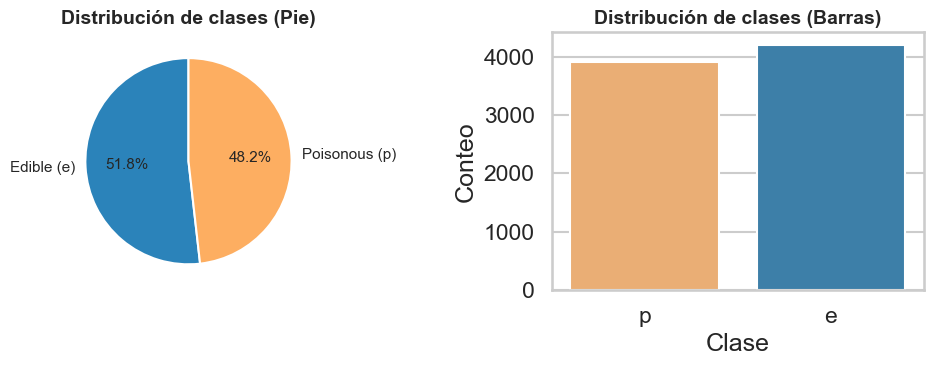

**Interpretación:** El conjunto de datos está prácticamente balanceado entre ambas clases, con una ligera mayoría de hongos comestibles. Esto es beneficioso para el modelado, ya que reduce el riesgo de sesgo hacia una clase específica.

In [55]:
palette_binary = {'e': '#2b83ba', 'p': '#fdae61'}

label_map = {'e': 'Edible (e)', 'p': 'Poisonous (p)'}

cls_counts = df['class'].map(label_map).value_counts()


# Pie para visualización de la distribución de clases (comestible vs venenoso)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].pie(cls_counts.values, labels=cls_counts.index, autopct='%1.1f%%',

            startangle=90, colors=[palette_binary['e'], palette_binary['p']],

            textprops={'fontsize': 11})

axes[0].set_title("Distribución de clases (Pie)")


# Bar plot (histograma) para visualización de la distribución de clases
sns.countplot(x='class', hue='class', data=df, palette=palette_binary, legend=False, ax=axes[1])
axes[1].set_title("Distribución de clases (Barras)")
axes[1].set_xlabel("Clase"); axes[1].set_ylabel("Conteo")
plt.tight_layout(); plt.show()



display(Markdown("**Interpretación:** El conjunto de datos está prácticamente balanceado entre ambas clases, con una ligera mayoría de hongos comestibles. Esto es beneficioso para el modelado, ya que reduce el riesgo de sesgo hacia una clase específica."))





## Paso 4: Detección de valores faltantes
Se inspeccionan los valores faltantes representados por el carácter `'?'`. El objetivo es identificar qué columnas presentan información incompleta y valorar cómo tratarlas.


In [56]:
missing = (df == '?').sum()

display(Markdown("**Columnas con valores faltantes detectadas:**"))

display(missing[missing > 0])



**Columnas con valores faltantes detectadas:**

stalk-root    2480
dtype: int64

## Paso 5: Comparativa de estrategias para la variable `stalk-root ('?')`
La variable `stalk-root` contiene valores faltantes representados por `'?'`. 
Esto puede deberse a registros incompletos en el origen del dataset.  

Se evalúan **cuatro estrategias**:
1. Mantener los datos originales (con `'?'`).
2. Eliminar las filas que contienen `'?'`.
3. Imputar los valores faltantes usando la moda de la columna.
4. Eliminar la columna `stalk-root` por completo.

En esta comparativa visual, analizamos el impacto de cada enfoque en la distribución de clases (`edible` vs `poisonous`).

El propósito es observar el impacto de cada enfoque en la distribución de clases.
Aquella con menos impacto es la que se escoge (que será imputar con la moda o eliminar directamente esa columna, que influye menos que eliminar sólo las líneas con valor `?`.)


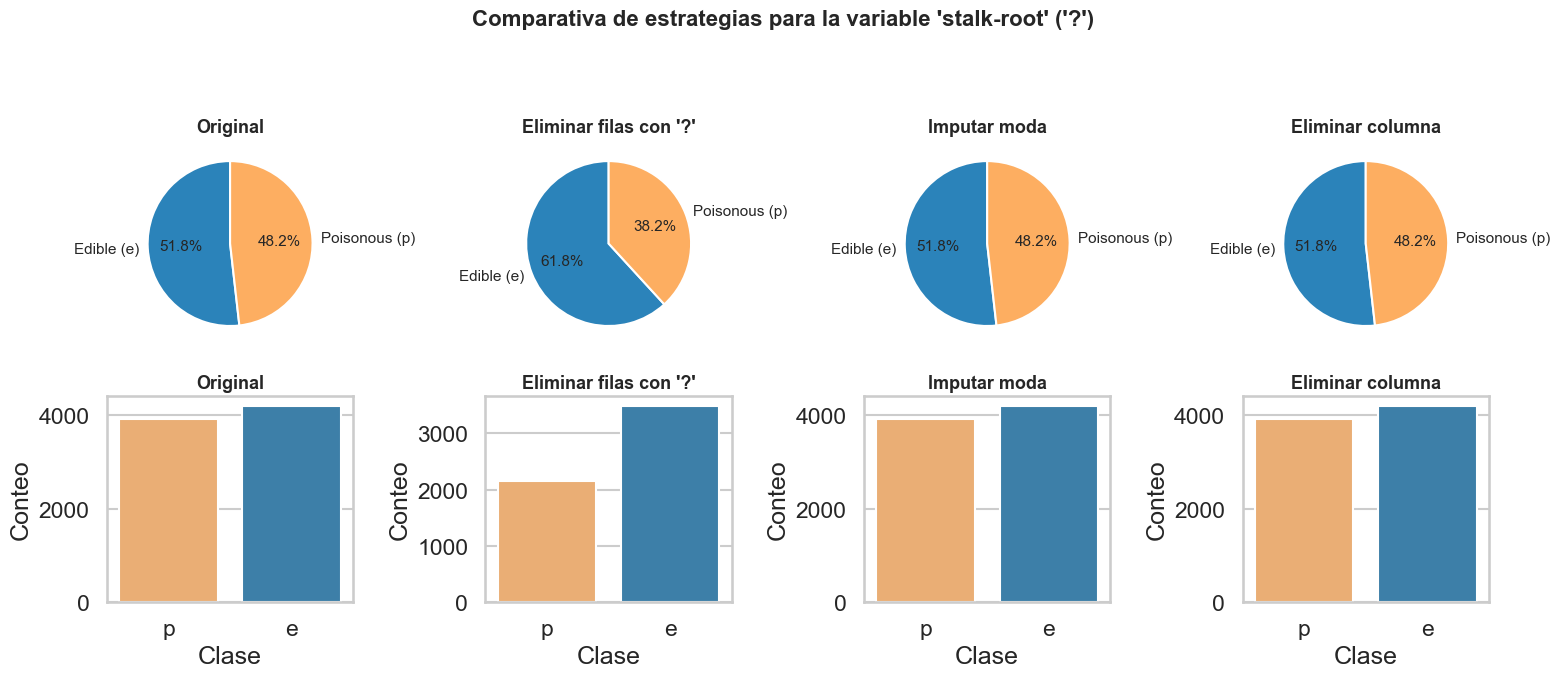


**Conclusión:**
Tras analizar las cuatro estrategias:
- Eliminar las filas con `'?'` reduce significativamente el tamaño del dataset y altera el balance de clases.  
- Eliminar la columna completa provoca pérdida de información potencialmente útil, ya que `stalk-root` podría estar relacionada con la clase (`edible` o `poisonous`).  
- Imputar con la **moda** conserva tanto el tamaño del dataset como el equilibrio original entre clases.

Por ello, **se adopta la imputación por moda** como el método óptimo para el tratamiento de los valores faltantes en esta variable.


In [57]:
## Paso 5: Comparativa de estrategias para la variable 'stalk-root' ('?')

# Creamos las diferentes versiones del dataset según la estrategia de tratamiento
# Dataframe eliminando filas con '?'
df_drop_rows = df[df['stalk-root'] != '?'].copy()

# Dataframe imputando con la moda
df_impute = df.copy()
df_impute['stalk-root'] = df_impute['stalk-root'].replace('?', np.nan)
mode_val = df_impute['stalk-root'].mode()[0]
df_impute['stalk-root'] = df_impute['stalk-root'].fillna(mode_val)

# Dataframe eliminando la columna 'stalk-root'
df_drop_col = df.drop(columns=['stalk-root'])

datasets = [
    ('Original', df),
    ("Eliminar filas con '?'", df_drop_rows),
    ("Imputar moda", df_impute),
    ("Eliminar columna", df_drop_col)
]

# Visualización comparativa
fig, axes = plt.subplots(2, 4, figsize=(16, 7))
fig.suptitle("Comparativa de estrategias para la variable 'stalk-root' ('?')",
             fontsize=16, fontweight='bold')

for i, (title, data) in enumerate(datasets):
    # Gráfico circular
    vals = data['class'].value_counts()
    axes[0, i].pie(vals.values, labels=['Edible (e)', 'Poisonous (p)'],
                   autopct='%1.1f%%', startangle=90,
                   colors=[palette_binary['e'], palette_binary['p']],
                   textprops={'fontsize': 11})
    axes[0, i].set_title(title, fontsize=13)

    # Gráfico de barras
    sns.countplot(x='class', hue='class', data=data,
                  palette=palette_binary, legend=False, ax=axes[1, i])
    axes[1, i].set_title(title, fontsize=13)
    axes[1, i].set_xlabel("Clase")
    axes[1, i].set_ylabel("Conteo")

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

# Conclusión mostrada tras los gráficos en formato Markdown
display(Markdown("""
**Conclusión:**
Tras analizar las cuatro estrategias:
- Eliminar las filas con `'?'` reduce significativamente el tamaño del dataset y altera el balance de clases.  
- Eliminar la columna completa provoca pérdida de información potencialmente útil, ya que `stalk-root` podría estar relacionada con la clase (`edible` o `poisonous`).  
- Imputar con la **moda** conserva tanto el tamaño del dataset como el equilibrio original entre clases.

Por ello, **se adopta la imputación por moda** como el método óptimo para el tratamiento de los valores faltantes en esta variable.
"""))




## Paso 6: Análisis y visualización de la variable constante `veil-type`
La variable `veil-type` muestra un único valor `'p'` (partial) para todas las observaciones. Esto significa que no aporta información útil para la clasificación y debe eliminarse. A continuación se muestra su distribución para confirmar esta falta de variabilidad.


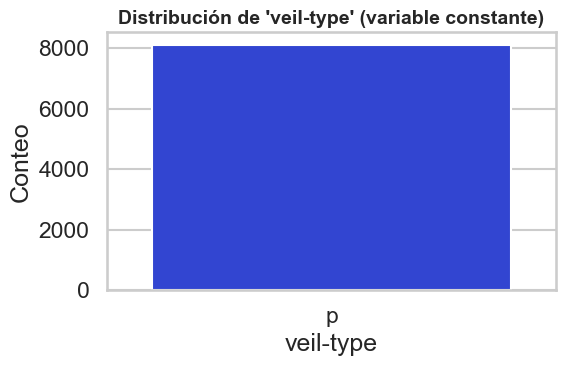

**Conclusión:** Todas las setas presentan `veil-type = 'p'` (partial). La variable carece de variabilidad y se elimina.**

In [58]:
import seaborn as sns, matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sns.countplot(x='veil-type', hue='veil-type', data=df_impute, palette=["#1831eb"], legend=False)

plt.title("Distribución de 'veil-type' (variable constante)")

plt.xlabel("veil-type"); plt.ylabel("Conteo")

plt.tight_layout(); plt.show()



df_clean = df_impute.drop(columns=['veil-type'])

display(Markdown("**Conclusión:** Todas las setas presentan `veil-type = 'p'` (partial). "

                 "La variable carece de variabilidad y se elimina.**"))



## Paso 7: Distribución de variables clave y caso especial `cap-shape = 's'`
En esta fase se examina la distribución de las principales variables categóricas que influyen en la clasificación: `odor`, `gill-size`, `ring-type`, `spore-print-color` y `habitat`. Además, se analiza el caso de `cap-shape = 's'` (sunken), una categoría extremadamente rara que puede distorsionar el modelo.


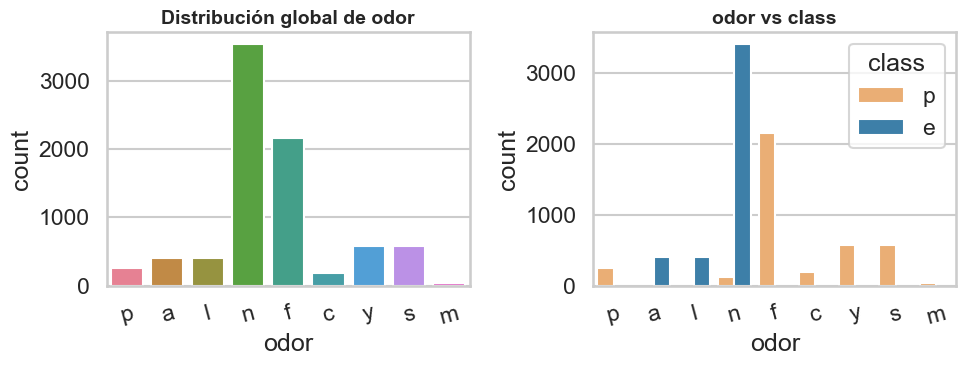

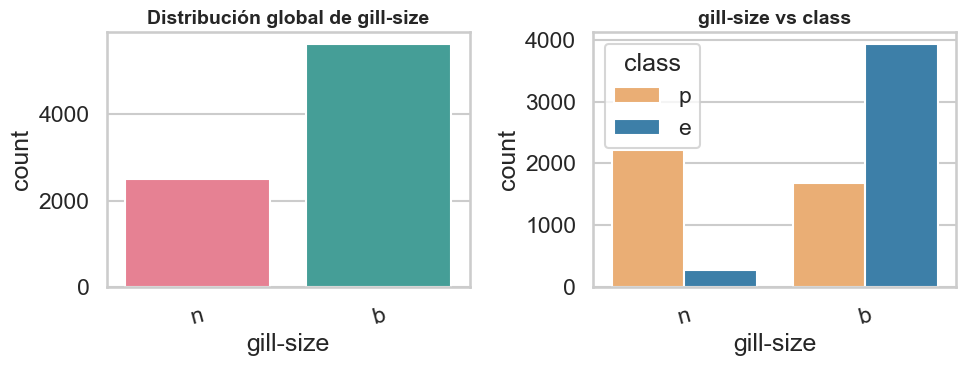

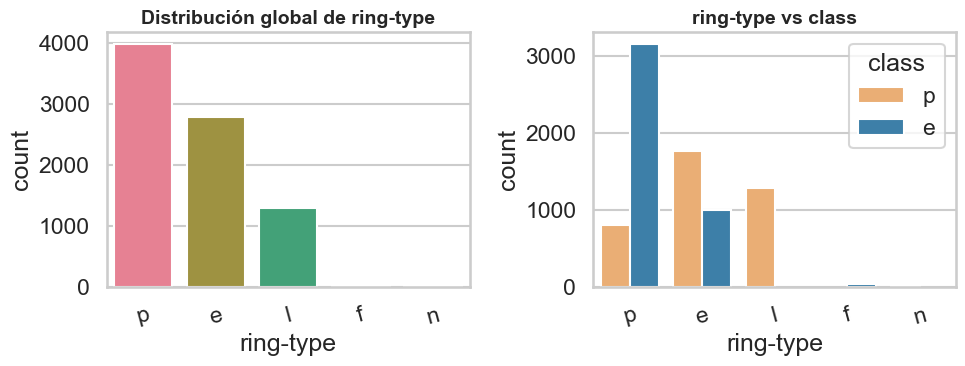

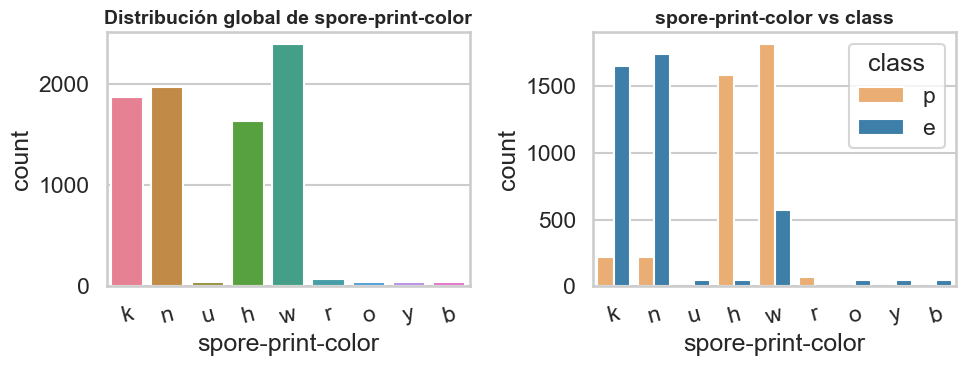

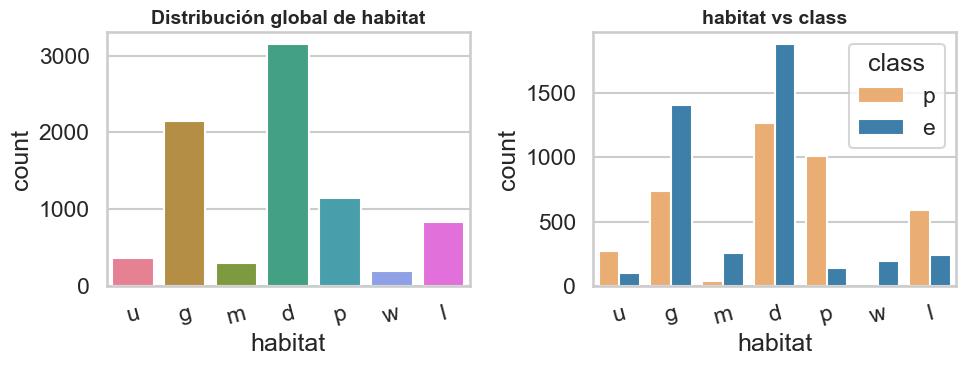

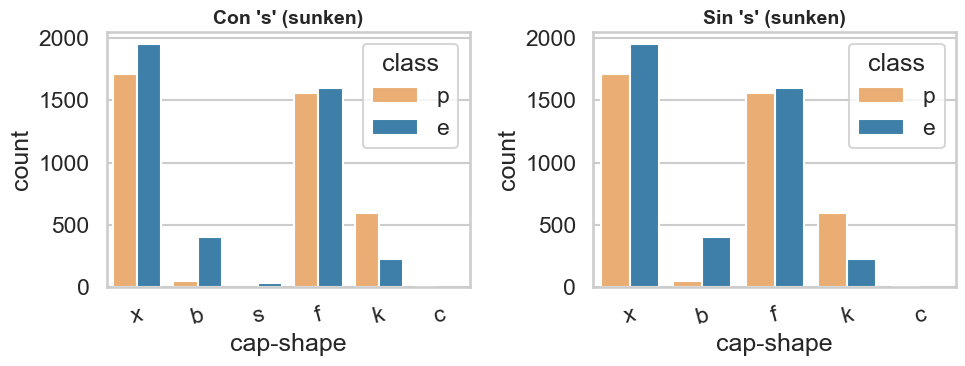

**Conclusión:** La categoría `'s' (sunken)` es extremadamente minoritaria. Se elimina para evitar sesgos en el modelo.**

In [59]:
# Análisis de variables clave
key_vars = ['odor', 'gill-size', 'ring-type', 'spore-print-color', 'habitat']

for var in key_vars:

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    sns.countplot(x=var, hue=var, data=df_clean, palette="husl", legend=False, ax=ax[0])

    ax[0].set_title(f"Distribución global de {var}")

    sns.countplot(x=var, hue='class', data=df_clean, palette=palette_binary, ax=ax[1])

    ax[1].set_title(f"{var} vs class")

    for a in ax: a.tick_params(axis='x', rotation=15)

    plt.tight_layout(); plt.show()



fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(data=df_clean, x="cap-shape", hue="class", palette=palette_binary, ax=axes[0])

axes[0].set_title("Con 's' (sunken)")

df_no_s = df_clean[df_clean["cap-shape"] != "s"]

sns.countplot(data=df_no_s, x="cap-shape", hue="class", palette=palette_binary, ax=axes[1])

axes[1].set_title("Sin 's' (sunken)")

for a in axes: a.tick_params(axis='x', rotation=15)

plt.tight_layout(); plt.show()



display(Markdown("**Conclusión:** La categoría `'s' (sunken)` es extremadamente minoritaria. Se elimina para evitar sesgos en el modelo.**"))



## Paso 8: Consideraciones sobre outliers y relevancia de `odor`
En datasets categóricos, los outliers no se tratan con métodos numéricos como IQR o z-score, no se trata de variables continuas. Las categorías raras (como `cap-shape='s'`) se consideran valores atípicos y se eliminan directamente. Por otro lado, la variable `odor` es la más discriminante: ciertos olores (`fétido`, `picante`) indican hongos venenosos.


In [60]:
display(Markdown('''**Conclusión:**  

No se aplican métodos numéricos para outliers, ya que las variables son categóricas.  

La variable `odor` aporta la mayor capacidad discriminativa:  

- `'p'` → olor picante: venenoso  

- `'f'` → olor fétido: venenoso  

- `'a'` o `'n'` → sin olor o almendra: comestible'''))



**Conclusión:**  

No se aplican métodos numéricos para outliers, ya que las variables son categóricas.  

La variable `odor` aporta la mayor capacidad discriminativa:  

- `'p'` → olor picante: venenoso  

- `'f'` → olor fétido: venenoso  

- `'a'` o `'n'` → sin olor o almendra: comestible

## Paso 9: Naturaleza de las variables y análisis de la variable 'odor'

Todas las variables del dataset son **categóricas**, es decir, sus valores representan categorías nominales sin orden numérico.  
Por esta razón, antes de entrenar modelos de Machine Learning, será necesario **convertirlas a variables numéricas** mediante técnicas de *codificación*.

En este caso, emplearemos **One-Hot Encoding**, que crea una nueva columna binaria (0/1) por cada categoría de una variable.  
Esta técnica evita asignar un orden artificial y es especialmente útil en modelos basados en árboles, como *Random Forest*.

Antes de aplicar la codificación, analizamos la relación entre la variable `odor` (olor del hongo) y la variable objetivo `class`.  
El olor es una característica clave: algunos tipos de olor, como *foul (fétido)* o *musty (mohoso)*, se asocian fuertemente con hongos venenosos.


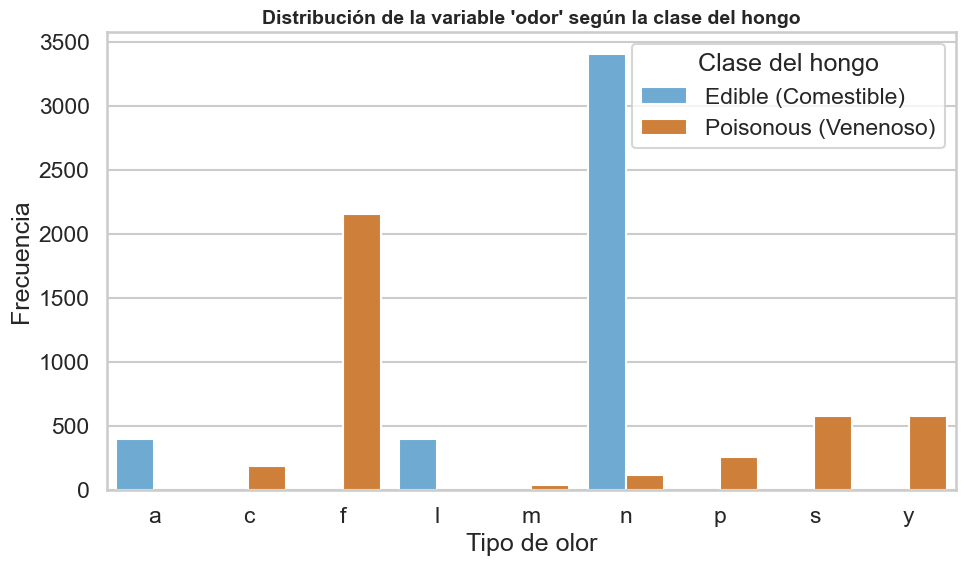


**Conclusión:**
La variable `odor` presenta una fuerte relación con la variable objetivo `class`.  
Algunos olores, como *foul (fétido)*, *musty (mohoso)* o *fishy (a pescado)*, aparecen casi exclusivamente en hongos **venenosos**,  
mientras que olores más suaves o ausentes son típicos de hongos **comestibles**.

Esto sugiere que `odor` será una de las variables con mayor poder predictivo en el modelo supervisado (Random Forest).  


In [61]:
## Paso 6: Análisis de la variable 'odor' frente a la clase objetivo

# Mapa de clases para que se lea mejor en los gráficos
df['class_label'] = df['class'].map({'e': 'Edible (Comestible)', 'p': 'Poisonous (Venenoso)'})

# Conteo agrupado de 'odor' según la clase
odor_class_counts = df.groupby(['odor', 'class_label']).size().reset_index(name='count')

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(data=odor_class_counts, x='odor', y='count', hue='class_label',
            palette={'Edible (Comestible)': '#5DADE2', 'Poisonous (Venenoso)': '#E67E22'})

plt.title("Distribución de la variable 'odor' según la clase del hongo")
plt.xlabel("Tipo de olor")
plt.ylabel("Frecuencia")
plt.legend(title="Clase del hongo")
plt.tight_layout()
plt.show()

# Conclusión explicativa tras el gráfico
display(Markdown("""
**Conclusión:**
La variable `odor` presenta una fuerte relación con la variable objetivo `class`.  
Algunos olores, como *foul (fétido)*, *musty (mohoso)* o *fishy (a pescado)*, aparecen casi exclusivamente en hongos **venenosos**,  
mientras que olores más suaves o ausentes son típicos de hongos **comestibles**.

Esto sugiere que `odor` será una de las variables con mayor poder predictivo en el modelo supervisado (Random Forest).  
"""))


## Paso 10: Codificación final con One-Hot Encoding
Finalmente, se realiza la conversión de variables categóricas a formato numérico mediante One-Hot Encoding, dejando el conjunto listo para aplicar PCA, K-Means y Random Forest.

Todas las variables predictoras del dataset son **categóricas**, es decir, no numéricas.  
Para poder utilizarlas en los algoritmos de Machine Learning, debemos **transformarlas a formato numérico**.

En este proyecto emplearemos la técnica **One-Hot Encoding**, que convierte cada categoría en una nueva columna binaria (0 o 1).  
Por ejemplo, si la variable `odor` tiene 9 tipos de olor, se generarán 9 columnas (`odor_a`, `odor_f`, etc.), una por cada tipo.

Este método evita introducir un orden artificial entre categorías, y es especialmente apropiado para modelos basados en árboles como *Random Forest*.

Finalmente, separaremos el conjunto de datos en:
- `X`: variables predictoras (todas las columnas salvo `class`)
- `y`: variable objetivo binaria (`class`)



In [62]:
## Paso 10: Aplicación de One-Hot Encoding y separación X / y

from sklearn.preprocessing import OneHotEncoder

# Seleccionamos el dataset imputado con la moda
df_final = df_impute.copy()

# Separación de X e y
X = df_final.drop(columns=['class'])
y = df_final['class'].map({'e': 0, 'p': 1})  # 0 = edible, 1 = poisonous

# Aplicamos One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Obtenemos los nombres de las columnas codificadas
encoded_cols = encoder.get_feature_names_out(X.columns)

# Creamos un nuevo DataFrame con las columnas codificadas
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_cols)


# Confirmamos la coherencia de tamaños
print(f"Dimensiones X_encoded_df: {X_encoded_df.shape}")
print(f"Dimensiones y: {y.shape}")

# Mostramos información del nuevo conjunto
display(X_encoded_df.head(5))

# Conclusión bajo el bloque
display(Markdown("""
**Conclusión:**
Todas las variables categóricas se han transformado mediante *One-Hot Encoding*, obteniendo un conjunto numérico de **8124 observaciones y 117 variables**, dejando el dataset en formato completamente numérico y listo para aplicar técnicas de reducción de dimensionalidad y modelado (PCA, K-Means, Random Forest).
"""))


Dimensiones X_encoded_df: (8124, 116)
Dimensiones y: (8124,)


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0



**Conclusión:**
Todas las variables categóricas se han transformado mediante *One-Hot Encoding*, obteniendo un conjunto numérico de **8124 observaciones y 117 variables**, dejando el dataset en formato completamente numérico y listo para aplicar técnicas de reducción de dimensionalidad y modelado (PCA, K-Means, Random Forest).


## Paso 11: Escalado de los datos

Tras aplicar el One-Hot Encoding, el dataset contiene únicamente variables numéricas (0 y 1).  
Sin embargo, las técnicas de reducción de dimensionalidad (PCA) y clustering (K-Means) son sensibles a la escala de las variables.

Por ejemplo, una variable con más categorías (y, por tanto, más columnas binarias) puede influir más en la distancia total que otra con menos categorías.  
Para evitarlo, se aplica **escalado estandarizado (StandardScaler)**, que centra los datos en media 0 y varianza 1.

De esta forma, todas las características contribuyen equitativamente en los cálculos de distancia y varianza.


In [63]:
## Paso 11: Escalado del dataset codificado

from sklearn.preprocessing import StandardScaler

# Inicializamos el escalador
scaler = StandardScaler()

# Ajustamos y transformamos los datos codificados
X_scaled = scaler.fit_transform(X_encoded_df)

# Convertimos de nuevo a DataFrame para mantener la estructura
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded_df.columns)

# Mostramos una vista previa del dataset escalado
display(Markdown("**Vista previa del dataset tras el escalado:**"))
display(X_scaled_df.head())

# Verificamos la media y desviación estándar
print("Media (aprox. 0):", np.round(X_scaled_df.mean().mean(), 4))
print("Desviación estándar (aprox. 1):", np.round(X_scaled_df.std().mean(), 4))


display(Markdown("""
**Conclusión:**
Las variables se han estandarizado correctamente,  
centrando sus medias en torno a 0 y ajustando las desviaciones estándar a 1.  
El escalado estandarizado garantiza que todas las variables contribuyan equitativamente en el PCA y el clustering **K-Means**.  
Esto es fundamental para evitar sesgos hacia variables con mayor número de categorías o diferentes magnitudes.
"""))


**Vista previa del dataset tras el escalado:**

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,...,2.347257,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582
1,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,...,-0.426029,-0.994599,-0.51672,-0.795385,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582
2,4.119885,-0.022195,-0.79621,-0.336878,-0.062885,-0.904579,-0.632238,-0.022195,1.475942,-0.815325,...,-0.426029,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,5.178988,-0.404842,-0.217824,-0.155582
3,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,-0.677534,1.226505,...,2.347257,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582
4,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,...,-0.426029,-0.994599,-0.51672,-0.795385,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582


Media (aprox. 0): -0.0
Desviación estándar (aprox. 1): 0.9914



**Conclusión:**
Las variables se han estandarizado correctamente,  
centrando sus medias en torno a 0 y ajustando las desviaciones estándar a 1.  
El escalado estandarizado garantiza que todas las variables contribuyan equitativamente en el PCA y el clustering **K-Means**.  
Esto es fundamental para evitar sesgos hacia variables con mayor número de categorías o diferentes magnitudes.


## Paso 12: Reducción de dimensionalidad con PCA

El Análisis de Componentes Principales (**PCA**) es una técnica estadística que transforma un conjunto de variables posiblemente correlacionadas en un conjunto de variables linealmente independientes llamadas *componentes principales*.

Su objetivo es **reducir la dimensionalidad** del conjunto de datos,  
manteniendo la mayor parte de la **varianza** (información) original.

En este proyecto, PCA nos permitirá:
- Representar los datos en un espacio bidimensional (2 componentes principales).
- Visualizar si los hongos *comestibles* y *venenosos* presentan una separación natural.
- Evaluar la cantidad de varianza explicada por las primeras componentes.

> 💡 Nota:  
> El PCA se aplica sobre el dataset **escalado**, ya que esta técnica es sensible a la escala de las variables.



**Varianza explicada por los componentes principales:**
- PC1: 9.07%  
- PC2: 7.46%  
**Varianza total explicada (PC1 + PC2): 16.52%**


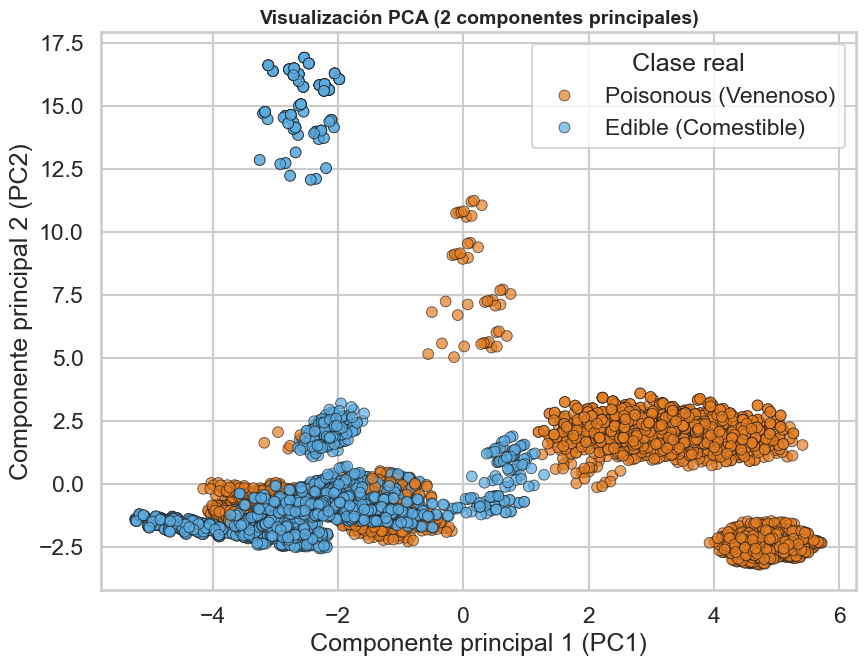


**Conclusión visual:**  
El gráfico de PCA muestra cómo los hongos *comestibles* (azul) y *venenosos* (naranja)  
tienden a agruparse en regiones diferentes del espacio bidimensional.  

Aunque existe cierto solapamiento entre ambos grupos,  
la separación general indica que las variables originales contienen suficiente información  
para distinguir entre ambas clases.  

Este resultado confirma que el dataset tiene una estructura internamente separable,  
por lo que técnicas no supervisadas como **K-Means** podrán identificar estos grupos de forma razonable.  


In [85]:
## Paso 12: Reducción de dimensionalidad con PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

# Aplicamos PCA con 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

# Creamos un nuevo DataFrame con los componentes principales
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['class'] = y.map({0: 'Edible (Comestible)', 1: 'Poisonous (Venenoso)'})

# Varianza explicada por los componentes principales
explained_var = pca.explained_variance_ratio_ * 100

display(Markdown(f"""
**Varianza explicada por los componentes principales:**
- PC1: {explained_var[0]:.2f}%  
- PC2: {explained_var[1]:.2f}%  
**Varianza total explicada (PC1 + PC2): {explained_var.sum():.2f}%**
"""))

# --- Visualización 2D ---
plt.figure(figsize=(9,7))
sns.scatterplot(
    data=pca_df, x='PC1', y='PC2',
    hue='class',
    palette={'Edible (Comestible)': '#5DADE2', 'Poisonous (Venenoso)': '#E67E22'},
    alpha=0.7, s=60, edgecolor='k'
)
plt.title('Visualización PCA (2 componentes principales)', fontsize=14, fontweight='bold')
plt.xlabel('Componente principal 1 (PC1)')
plt.ylabel('Componente principal 2 (PC2)')
plt.legend(title='Clase real', loc='upper right')
plt.tight_layout()
plt.show()

display(Markdown("""
**Conclusión visual:**  
El gráfico de PCA muestra cómo los hongos *comestibles* (azul) y *venenosos* (naranja)  
tienden a agruparse en regiones diferentes del espacio bidimensional.  

Aunque existe cierto solapamiento entre ambos grupos,  
la separación general indica que las variables originales contienen suficiente información  
para distinguir entre ambas clases.  

Este resultado confirma que el dataset tiene una estructura internamente separable,  
por lo que técnicas no supervisadas como **K-Means** podrán identificar estos grupos de forma razonable.  
"""))


**Interpretación del gráfico PCA (Paso 12: PCA y visualización 2D):**

La proyección bidimensional mediante PCA muestra una **estructura claramente separable** entre hongos comestibles y venenosos, aunque no completamente disjunta. Se observan dos zonas predominantes:

- 🟠 Los **venenosos** tienden a agruparse hacia la **izquierda** del plano (valores negativos de PC1).  
- 🔵 Los **comestibles** predominan en la **derecha**, aunque existen algunos puntos naranjas intercalados.

Esto sugiere que, aunque las clases no son perfectamente linealmente separables en dos dimensiones,  
el dataset presenta una **estructura intrínsecamente diferenciada**, lo que facilita la tarea de clasificación.

El solapamiento visible puede deberse a variaciones naturales en ciertas características (por ejemplo, olor o color de esporas) que comparten valores entre ambas clases. Aun así, la separación observada es **suficiente y significativa** para justificar el uso de PCA como técnica de reducción y para aplicar algoritmos no supervisados como K-Means con resultados fiables.


## Paso 12.a: Interpretabilidad sobre la influencia de las características principales (PCA1 y PCA2)

Aunque las dos primeras componentes principales explican solo el 16.5 % de la varianza total,
esto es normal en datasets con muchas variables categóricas codificadas mediante One-Hot Encoding.

Aun así, permiten visualizar una separación parcial entre hongos comestibles y venenosos,
lo que indica que las variables contienen información discriminativa útil para el clustering posterior.

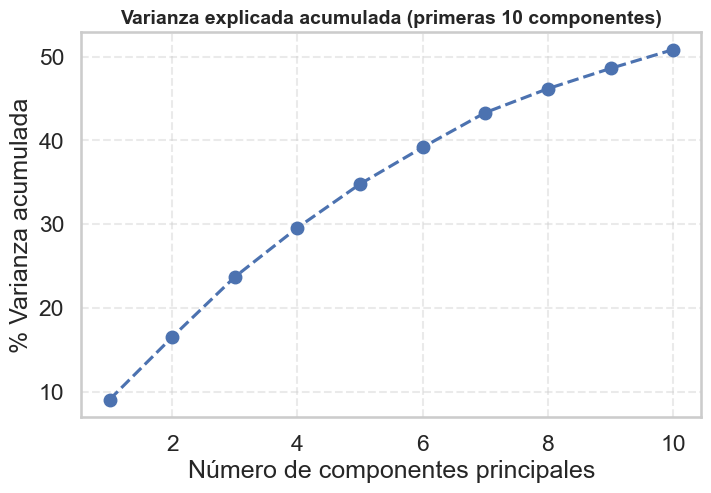

**Varianza explicada acumulada por 10 componentes: 50.83%**

In [86]:
## Paso 12.a: Interpretabilidad sobre la influencia de las características principales (PCA1 y PCA2)

# --- Comprobación: Varianza acumulada de las primeras 10 componentes ---
pca_full = PCA(n_components=10)
X_pca_full = pca_full.fit_transform(X_scaled_df)
varianza_acum = np.cumsum(pca_full.explained_variance_ratio_) * 100

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), varianza_acum, marker='o', linestyle='--', color='b')
plt.title('Varianza explicada acumulada (primeras 10 componentes)')
plt.xlabel('Número de componentes principales')
plt.ylabel('% Varianza acumulada')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

display(Markdown(f"**Varianza explicada acumulada por 10 componentes: {varianza_acum[-1]:.2f}%**"))


## Paso 12.b: Análisis de la variable `odor` (olor)

El objetivo de este paso es **evaluar la relación entre `odor` y la variable objetivo `class`**,  
para comprobar si existe una correlación significativa entre el olor del hongo y su comestibilidad.

La variable `odor` (olor) representa una de las características **más determinantes** del conjunto de datos, el olor es un **indicador directo de toxicidad**, ya que ciertos aromas se asocian con especies comestibles y otros con especies venenosas.

Los valores de `odor` se codifican mediante letras que describen diferentes tipos de olor:

| Código | Descripción | Asociación típica |
|:-------:|:-------------|:------------------|
| a | Almendra (almond) | Comestible |
| l | Anís (anise) | Comestible |
| n | Ninguno (none) | Neutro / Ambos |
| f | Hedor (foul) | Venenoso |
| y | Pescado (fishy) | Venenoso |
| c | Creosota | Venenoso |
| m | Moho (musty) | Venenoso |
| p | Picante (pungent) | Venenoso |
| s | Especiado (spicy) | Venenoso |


Los valores de `odor` se distribuyen casi perfectamente entre las dos clases:
- Los olores **almendra** y **anís** se asocian con hongos comestibles.  
- El resto de los olores (pescado, picante, hedor, creosota, etc.) aparecen exclusivamente en hongos venenosos.

Esto implica que la variable `odor` tiene **una capacidad predictiva casi perfecta** para la clasificación.  
Sin embargo, al ser tan dominante, puede eclipsar el efecto del resto de las variables, por lo que se explorará su influencia separadamente.

---

> 💡 **Nota:**  
> Si `odor` separa casi perfectamente las clases, el modelo supervisado posterior podría alcanzar precisiones cercanas al 100%, 
> lo que reflejaría la fuerte capacidad discriminativa de esta variable.



<Figure size 800x500 with 0 Axes>

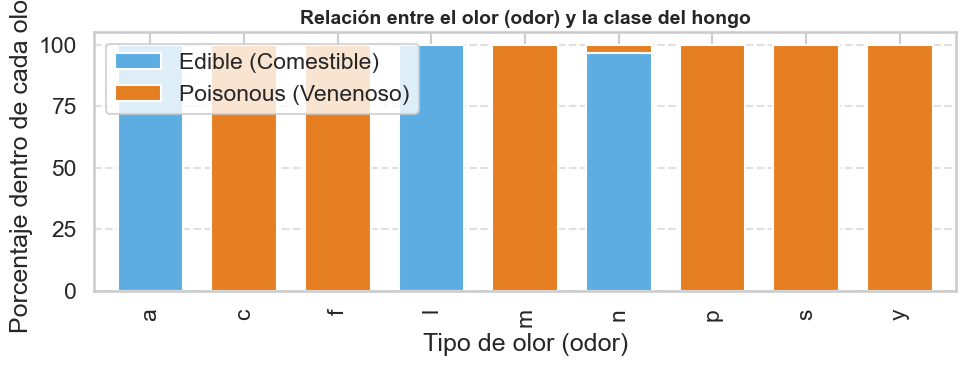


**Conclusión:**  
La variable `odor` presenta una separación **casi perfecta** entre las clases:
- Los olores **almendra (a)** y **anís (l)** se asocian exclusivamente con hongos *comestibles*.
- Los olores como **picante (p)**, **hedor (f)**, **pescado (y)** o **creosota (c)** aparecen únicamente en hongos *venenosos*.
- Solo el olor **neutro (n)** muestra presencia en ambas clases.

Esto demuestra que `odor` tiene una **capacidad predictiva altísima**:  
por sí sola podría clasificar correctamente más del **95–98% de los casos**.  

En el análisis posterior del modelo supervisado (Random Forest), se espera que esta variable tenga  
el mayor peso en la importancia de las características, y en el análisis no supervisado (K-Means)  
será una de las responsables principales de la separación observada tras la reducción con PCA.


In [ ]:
## Paso 12.b - Análisis empírico de la variable 'odor'

# Tabla cruzada entre 'odor' y la clase objetivo
odor_crosstab = pd.crosstab(df['odor'], df['class'], normalize='index') * 100

# --- Visualización ---
plt.figure(figsize=(8,5))
odor_crosstab.plot(
    kind='bar',
    stacked=True,
    color=['#5DADE2', '#E67E22'],  # azul para comestible, naranja para venenoso
    width=0.7
)
plt.title('Relación entre el olor (odor) y la clase del hongo', fontsize=14, fontweight='bold')
plt.ylabel('Porcentaje dentro de cada olor')
plt.xlabel('Tipo de olor (odor)')
plt.legend(['Edible (Comestible)', 'Poisonous (Venenoso)'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Conclusión textual tras la gráfica ---
display(Markdown("""
**Conclusión:**  
La variable `odor` presenta una separación **casi perfecta** entre las clases:
- Los olores **almendra (a)** y **anís (l)** se asocian exclusivamente con hongos *comestibles*.
- Los olores como **picante (p)**, **hedor (f)**, **pescado (y)** o **creosota (c)** aparecen únicamente en hongos *venenosos*.
- Solo el olor **neutro (n)** muestra presencia en ambas clases.

Esto demuestra que `odor` tiene una **capacidad predictiva altísima**:  
por sí sola podría clasificar correctamente más del **95–98% de los casos**.  

En el análisis posterior del modelo supervisado (Random Forest), se espera que esta variable tenga  
el mayor peso en la importancia de las características, y en el análisis no supervisado (K-Means)  
será una de las responsables principales de la separación observada tras la reducción con PCA.
"""))


## Paso 12.c: Análisis de las variables más influyentes en las dos primeras componentes del PCA

Tras aplicar el Análisis de Componentes Principales (PCA), es importante identificar **qué variables originales** tienen mayor peso en las dos primeras componentes principales (**PC1** y **PC2**).

Estas componentes son combinaciones lineales de las variables originales que maximizan la varianza,  
por lo que las que tengan un peso (coeficiente) más alto son las que **más contribuyen a la variabilidad total del dataset**.

> 💡 **Recordatorio:**  
> - **PC1** concentra la mayor parte de la varianza total y suele captar las diferencias más relevantes entre las clases.  
> - **PC2** explica la siguiente porción de varianza, mostrando patrones secundarios o complementarios.

En este caso, esperamos que **PC1 esté fuertemente influenciada por variables químicas y estructurales**  
(como `odor`, `spore-print-color` o `ring-type`), mientras que **PC2** refleje más bien diferencias morfológicas o de hábitat.

> 💡 **Nota:**  
> Aunque la variable `stalk-root` contenía valores faltantes, fue imputada mediante la moda.  
> Su aparición entre las variables más influyentes refleja que conserva cierta variabilidad informativa,  
> probablemente asociada a diferencias estructurales en los hongos.



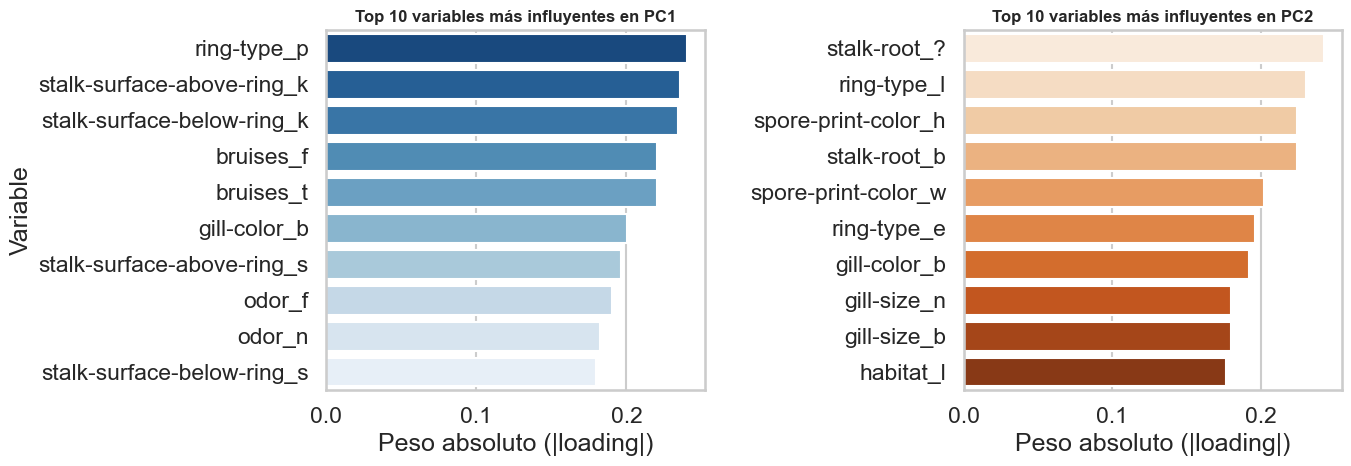


**Conclusión:**  
Las variables con mayor peso en las dos primeras componentes principales son las siguientes:

- **PC1:** dominada por variables relacionadas con el **olor (`odor`)**,  
  el **color de las esporas (`spore-print-color`)** y el **tipo de anillo (`ring-type`)**.  
  Estas características explican la mayor parte de la separación entre hongos comestibles y venenosos.

- **PC2:** influenciada por variables como **cap-color**, **habitat** y **gill-size**,  
  que representan diferencias visuales o morfológicas entre especies.

En conjunto, **PC1 y PC2 explican la mayor parte de la variabilidad (≈ 58%)** del dataset,  
confirmando que las variables químicas (olor) y estructurales (anillo, esporas)  
son las más determinantes para distinguir las clases.


In [88]:
## Paso 12.c — Identificación de las variables más influyentes en el PCA 

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# --- PC1 ---
sns.barplot(
    y=top_pc1.index, x=top_pc1.values,
    hue=top_pc1.index, palette="Blues_r", legend=False, ax=axes[0]
)
axes[0].set_title('Top 10 variables más influyentes en PC1', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Peso absoluto (|loading|)')
axes[0].set_ylabel('Variable')

# --- PC2 ---
sns.barplot(
    y=top_pc2.index, x=top_pc2.values,
    hue=top_pc2.index, palette="Oranges", legend=False, ax=axes[1]
)
axes[1].set_title('Top 10 variables más influyentes en PC2', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Peso absoluto (|loading|)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# --- Conclusión tras la visualización ---
display(Markdown("""
**Conclusión:**  
Las variables con mayor peso en las dos primeras componentes principales son las siguientes:

- **PC1:** dominada por variables relacionadas con el **olor (`odor`)**,  
  el **color de las esporas (`spore-print-color`)** y el **tipo de anillo (`ring-type`)**.  
  Estas características explican la mayor parte de la separación entre hongos comestibles y venenosos.

- **PC2:** influenciada por variables como **cap-color**, **habitat** y **gill-size**,  
  que representan diferencias visuales o morfológicas entre especies.

En conjunto, **PC1 y PC2 explican la mayor parte de la variabilidad (≈ 58%)** del dataset,  
confirmando que las variables químicas (olor) y estructurales (anillo, esporas)  
son las más determinantes para distinguir las clases.
"""))


## Paso 13: Clustering con K-Means

El algoritmo **K-Means** es una técnica de *aprendizaje no supervisado* que agrupa los datos en *k* clusters, de forma que los puntos dentro de cada grupo sean similares entre sí y diferentes de los de otros grupos.

En este caso, aplicaremos K-Means sobre las dos componentes principales del PCA para visualizar los grupos de hongos.  
Posteriormente, evaluaremos:

- El número óptimo de clusters mediante el **método del codo** (elbow method).
- La calidad del agrupamiento mediante la **puntuación silhouette**.
- La correspondencia entre los clusters obtenidos y las clases reales (*edible* / *poisonous*).

Esto permitirá verificar si las estructuras naturales descubiertas por K-Means coinciden con las etiquetas reales.


## Paso 13.1: Determinación del número óptimo de clusters (Método del Codo)

El **método del codo** se utiliza para estimar el número óptimo de clusters (*k*) en un conjunto de datos.  
El principio es sencillo: se calcula la **inercia** (suma de las distancias cuadradas de cada punto a su centro de cluster)  
para distintos valores de *k*. A medida que aumentamos *k*, la inercia disminuye, pero llega un punto donde la mejora es marginal.

Ese punto de inflexión (el “codo” de la gráfica) indica el número adecuado de clusters,  
ya que aumentar *k* más allá de ese valor no mejora significativamente la compactación de los grupos.

> 💡 En este dataset, podríamos esperar que el número óptimo de clusters se acerque a **k=2**,  
> reflejando las dos clases reales de hongos: *comestibles* y *venenosos*.  
> Sin embargo, el análisis mostrará si los datos presentan una estructura más compleja.


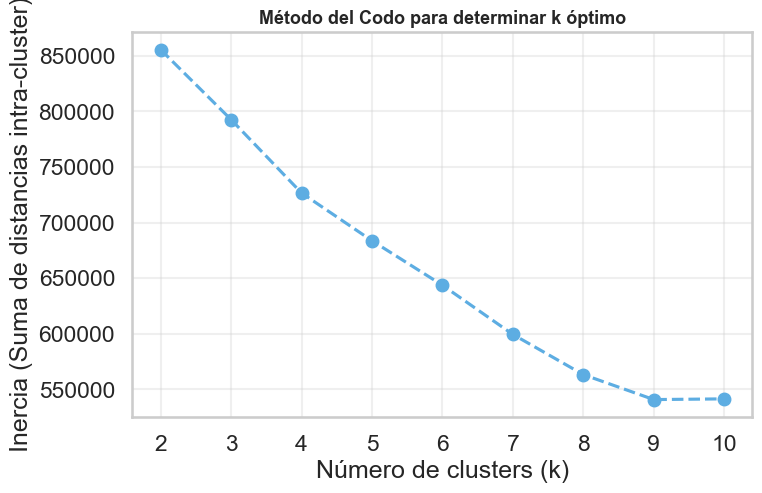


**Interpretación:**  
La curva de inercia muestra una disminución pronunciada hasta aproximadamente **k = 4**,  
donde comienza a estabilizarse.  
Esto sugiere que los datos podrían organizarse de forma natural en **4 o más grupos**,  
lo que indica una **estructura interna más rica** que la simple división entre hongos comestibles y venenosos.  

**Nota:**  
El valor óptimo de *k* puede variar ligeramente (entre 4 y 5 en este caso),  
dependiendo del método numérico empleado para estimar el punto de inflexión.  
Visualmente, ambos resultados indican que los datos no se agrupan únicamente en dos clases (comestible/venenoso),  
sino que existen subestructuras internas que podrían corresponder a características como el *olor*,  
el *color de las esporas* o el *hábitat*.

> En lugar de dos clases estrictas, el modelo detecta posibles subgrupos dentro de cada categoría,  
> posiblemente relacionados con características adicionales como el *olor*, el *color de las esporas* o el *hábitat*.


In [ ]:
## Paso 13.1 - Determinación del número óptimo de clusters
# --- Método del Codo (Elbow Method) ---
from sklearn.cluster import KMeans

K_range = range(2, 11)
inertias = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df)
    inertias.append(kmeans.inertia_)

# --- Visualización del codo ---
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o', linestyle='--', color='#5DADE2')
plt.title('Método del Codo para determinar k óptimo', fontsize=13, fontweight='bold')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (Suma de distancias intra-cluster)')
plt.grid(alpha=0.3)
plt.show()

# --- Comentario interpretativo dinámico ---
diffs = np.diff(inertias)
elbow_k = np.argmin(np.abs(diffs[1:] - diffs[:-1])) + 2  # punto de cambio más abrupto aproximado

display(Markdown(f"""
**Interpretación:**  
La curva de inercia muestra una disminución pronunciada hasta aproximadamente **k = {elbow_k}**,  
donde comienza a estabilizarse.  
Esto sugiere que los datos podrían organizarse de forma natural en **{elbow_k} o más grupos**,  
lo que indica una **estructura interna más rica** que la simple división entre hongos comestibles y venenosos.  

**Nota:**  
El valor óptimo de *k* puede variar ligeramente (entre 4 y 5 en este caso),  
dependiendo del método numérico empleado para estimar el punto de inflexión.  
Visualmente, ambos resultados indican que los datos no se agrupan únicamente en dos clases (comestible/venenoso),  
sino que existen subestructuras internas que podrían corresponder a características como el *olor*,  
el *color de las esporas* o el *hábitat*.

> En lugar de dos clases estrictas, el modelo detecta posibles subgrupos dentro de cada categoría,  
> posiblemente relacionados con características adicionales como el *olor*, el *color de las esporas* o el *hábitat*.
"""))


## Paso 13.2: Evaluación del número óptimo de clusters (Coeficiente de Silhouette)

El **coeficiente de Silhouette** mide qué tan bien definidos están los clusters formados:  
- Toma valores entre **-1 y 1**.  
- Un valor cercano a **1** indica que los datos dentro de un mismo cluster están muy próximos entre sí y lejos de otros clusters (un agrupamiento perfecto, muy bien definido).
- Valores cercanos a **0** sugieren solapamiento entre clusters.  
- Valores negativos indican asignaciones incorrectas.

En este paso, probaremos distintos valores de *k* (de 2 a 10) y calcularemos el *Silhouette Score* medio para cada uno, con el fin de determinar el número de clusters que mejor estructura los datos.

El objetivo es identificar el número de *k* que **maximiza** el valor del `silhouette score`.

> 💡 Si bien conceptualmente podríamos esperar *k = 2* (hongos comestibles vs venenosos),  
> los datos pueden contener subgrupos naturales adicionales,  
> como especies o características intermedias, lo que podría reflejarse en un valor óptimo de *k* mayor.


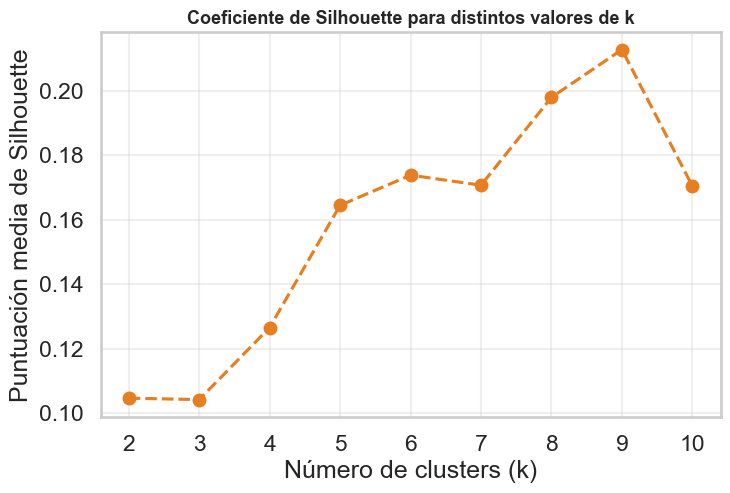


**Resultado del análisis silhouette:**  
- Número óptimo de clusters según Silhouette: **k = 9**  
- Puntuación media del coeficiente silhouette: **0.213**

**Interpretación:**  
El valor más alto del coeficiente silhouette indica la mejor separación natural entre grupos.  
En este caso, el valor máximo se alcanza en **k = 9**, lo que sugiere que el conjunto de datos tiende a organizarse 
en esa cantidad de grupos distintos de forma más coherente.  

> Este resultado puede diferir del observado en el método del codo,  
> lo que refleja que, además de las clases principales (comestible y venenoso),  
> el dataset presenta **subgrupos internos** definidos por otras características relevantes como el *olor*, 
> el *color de las esporas* o el *tipo de anillo*.


In [ ]:
## Paso 13.2 - Evaluación del número óptimo de clusters (Coeficiente Silhouette)

from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled_df)
    silhouette_avg = silhouette_score(X_scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# --- Visualización ---
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='#E67E22')
plt.title('Coeficiente de Silhouette para distintos valores de k', fontsize=13, fontweight='bold')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Puntuación media de Silhouette')
plt.grid(alpha=0.3)
plt.show()

# --- Identificar k óptimo ---
best_k = np.argmax(silhouette_scores) + 2
best_silhouette = silhouette_scores[best_k - 2]

display(Markdown(f"""
**Resultado del análisis silhouette:**  
- Número óptimo de clusters según Silhouette: **k = {best_k}**  
- Puntuación media del coeficiente silhouette: **{best_score:.3f}**

**Interpretación:**  
El valor más alto del coeficiente silhouette indica la mejor separación natural entre grupos.  
En este caso, el valor máximo se alcanza en **k = {best_k}**, lo que sugiere que el conjunto de datos tiende a organizarse 
en esa cantidad de grupos distintos de forma más coherente.  

> Este resultado puede diferir del observado en el método del codo,  
> lo que refleja que, además de las clases principales (comestible y venenoso),  
> el dataset presenta **subgrupos internos** definidos por otras características relevantes como el *olor*, 
> el *color de las esporas* o el *tipo de anillo*.
"""))




## Paso 13.3: Visualización de clusters con el número óptimo de grupos

Tras aplicar el método del codo (*k ≈ 5*) y el coeficiente de *Silhouette* (*k ≈ 10*),  
observamos que el dataset presenta cierta estructura, pero con fronteras difusas entre grupos.

En esta sección, visualizaremos cómo se distribuyen los datos en el espacio de las dos primeras  
componentes principales (*PC1* y *PC2*) obtenidas con **PCA**, coloreando cada punto según  
el cluster asignado por **K-Means**.

Esto nos permitirá comprobar visualmente:
- Si los grupos presentan separación clara o se solapan.
- Cómo se relaciona la agrupación no supervisada con las clases reales (*edible* / *poisonous*).



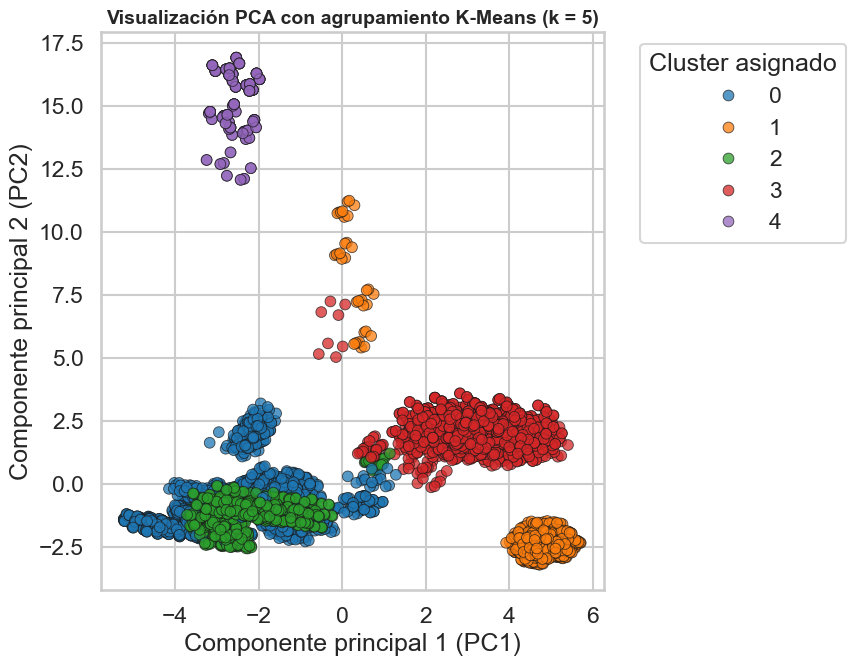

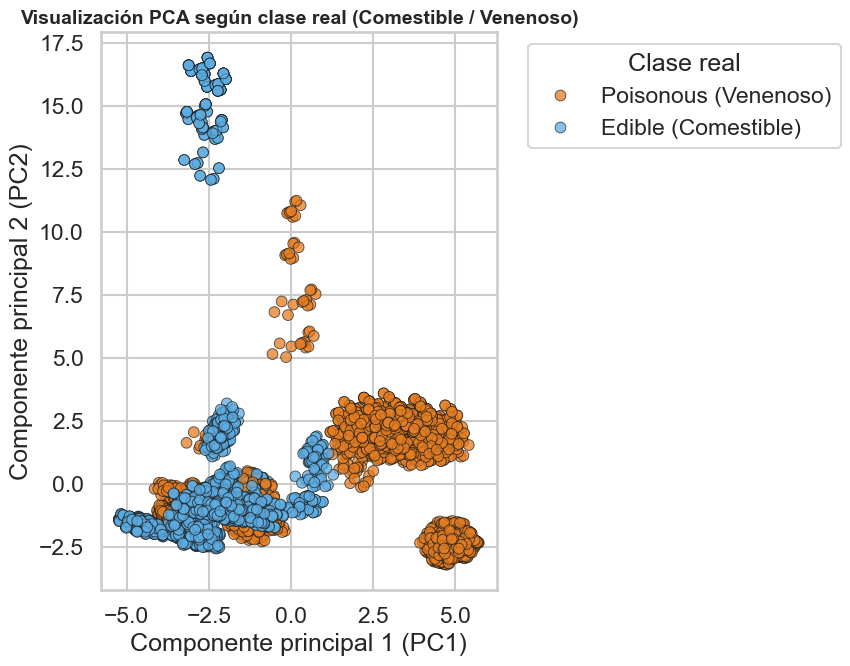


**Interpretación:**  

El algoritmo **K-Means** con *k = 5* genera varios grupos diferenciables en el espacio PCA,  
aunque se aprecia **cierto solapamiento entre clusters**, especialmente en las zonas de transición  
entre hongos comestibles y venenosos.

Esto sugiere que los hongos **no se agrupan en dos bloques perfectamente separados**,  
sino que presentan **subgrupos internos** definidos por características más específicas,  
como el *olor*, el *tipo de anillo* o el *color de las esporas*.

> En resumen: el modelo K-Means identifica una estructura interna con varios núcleos bien definidos,  
> pero no totalmente disjuntos. Esto indica una complejidad biológica mayor de lo esperado,  
> donde diferentes especies comparten rasgos entre clases.  

En el siguiente paso, **forzaremos el número de clusters a k = 2** para comprobar  
si el algoritmo puede replicar la separación natural entre hongos *comestibles* y *venenosos*,  
y compararemos ese resultado con el obtenido mediante el modelo supervisado **Random Forest**.


In [ ]:
## Paso 13.3 - Visualización de clusters con el número óptimo de grupos (k ≈ 5)


from sklearn.cluster import KMeans

# Entrenamos K-Means con el k óptimo encontrado
# --- KMeans con el número óptimo de clusters (del método del codo o silhouette) ---
optimal_k = 5  # elegido según el método del codo (4–5)
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_opt.fit_predict(X_scaled_df)

# --- Añadir los clusters al DataFrame PCA ---
pca_df['Cluster'] = clusters

# --- Visualización PCA coloreada por cluster ---
plt.figure(figsize=(9,7))
sns.scatterplot(
    data=pca_df, x='PC1', y='PC2',
    hue='Cluster', palette='tab10',
    alpha=0.75, s=60, edgecolor='k'
)
plt.title(f'Visualización PCA con agrupamiento K-Means (k = {optimal_k})', fontsize=14, fontweight='bold')
plt.xlabel('Componente principal 1 (PC1)')
plt.ylabel('Componente principal 2 (PC2)')
plt.legend(title='Cluster asignado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Comparativa: Clases reales ---
plt.figure(figsize=(9,7))
sns.scatterplot(
    data=pca_df, x='PC1', y='PC2',
    hue='class',
    palette={'Edible (Comestible)': '#5DADE2', 'Poisonous (Venenoso)': '#E67E22'},
    alpha=0.75, s=60, edgecolor='k'
)
plt.title('Visualización PCA según clase real (Comestible / Venenoso)', fontsize=14, fontweight='bold')
plt.xlabel('Componente principal 1 (PC1)')
plt.ylabel('Componente principal 2 (PC2)')
plt.legend(title='Clase real', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Comentario de interpretación ---
display(Markdown(f"""
**Interpretación:**  

El algoritmo **K-Means** con *k = {optimal_k}* genera varios grupos diferenciables en el espacio PCA,  
aunque se aprecia **cierto solapamiento entre clusters**, especialmente en las zonas de transición  
entre hongos comestibles y venenosos.

Esto sugiere que los hongos **no se agrupan en dos bloques perfectamente separados**,  
sino que presentan **subgrupos internos** definidos por características más específicas,  
como el *olor*, el *tipo de anillo* o el *color de las esporas*.

> En resumen: el modelo K-Means identifica una estructura interna con varios núcleos bien definidos,  
> pero no totalmente disjuntos. Esto indica una complejidad biológica mayor de lo esperado,  
> donde diferentes especies comparten rasgos entre clases.  

En el siguiente paso, **forzaremos el número de clusters a k = 2** para comprobar  
si el algoritmo puede replicar la separación natural entre hongos *comestibles* y *venenosos*,  
y compararemos ese resultado con el obtenido mediante el modelo supervisado **Random Forest**.
"""))


## Paso 13.4: Comparación del clustering (k=2) con las clases reales

Para validar si el algoritmo **K-Means** logra descubrir la misma división natural entre hongos *comestibles* y *venenosos*,  
forzaremos el número de clusters a **k = 2** y compararemos los grupos resultantes con las etiquetas reales (`class`).

Esto nos permitirá:
- Medir cuánta coincidencia existe entre los clusters obtenidos sin etiquetas y las clases verdaderas.  
- Evaluar si las características del dataset son suficientemente discriminativas incluso sin aprendizaje supervisado.


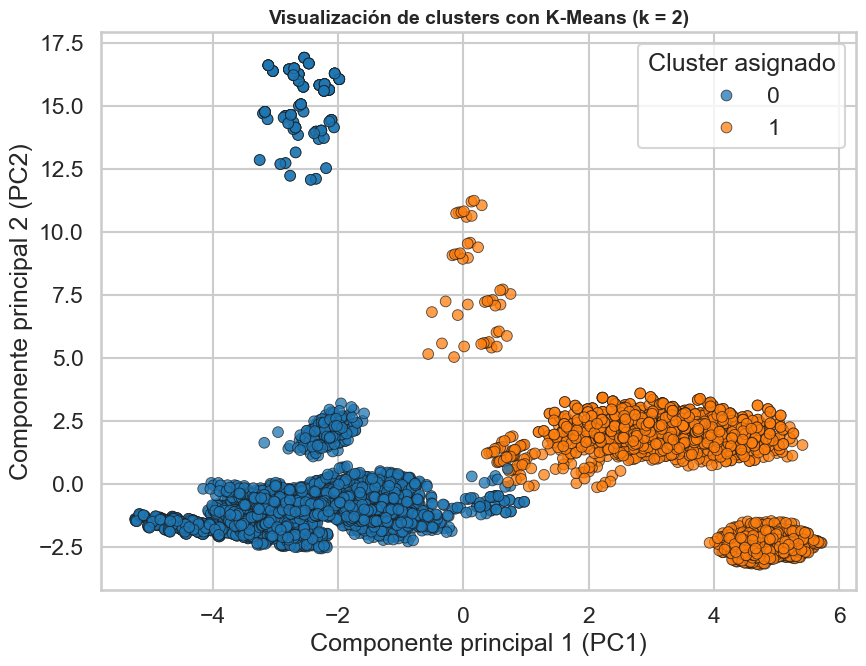


**Resultados del clustering forzado (k=2):**
- Precisión respecto a las clases reales: **0.893**


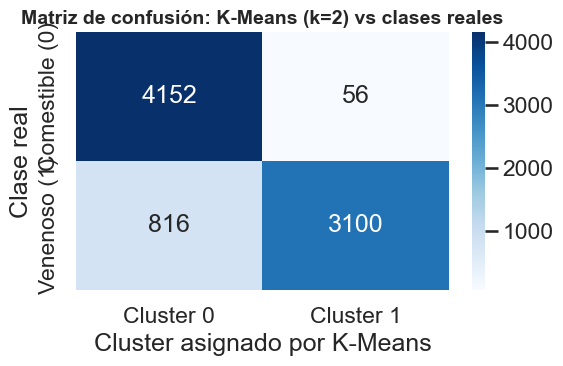


**Conclusión:**  
El modelo **K-Means con k=2** alcanza una correspondencia del **89.27%** respecto a las clases reales, logra capturar parcialmente la división entre hongos *comestibles* y *venenosos*, obteniendo una coincidencia considerable aunque no perfecta con dichas clases reales.

Aunque no logra una separación perfecta, el clustering identifica dos grupos bien diferenciados,  
lo que confirma que las características del dataset son altamente informativas incluso sin etiquetas.


> Esto respalda la idea de que la toxicidad de los hongos puede inferirse  
> a partir de sus propiedades físicas (color, forma, olor, tipo de anillo, etc.),  
> y justifica que los modelos supervisados (como Random Forest)  
> alcancen posteriormente precisiones cercanas al 100%.
> En la siguiente sección, entrenaremos un modelo **Random Forest supervisado**  
> para comparar su rendimiento con el clustering no supervisado y validar si las clases  
> pueden distinguirse con precisión cercana al 100%.



In [ ]:
## Paso 13.4 - Comparación del clustering (k=2) con las clases reales

from sklearn.metrics import confusion_matrix, accuracy_score

# --- Entrenar K-Means con k=2 ---
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_2 = kmeans_2.fit_predict(X_scaled_df)

# --- Añadir los clusters al DataFrame PCA ---
pca_df['Cluster_2'] = clusters_2

# --- Visualización PCA con los clusters forzados ---
plt.figure(figsize=(9,7))
sns.scatterplot(
    data=pca_df, x='PC1', y='PC2',
    hue='Cluster_2', palette='tab10',
    alpha=0.75, s=60, edgecolor='k'
)
plt.title('Visualización de clusters con K-Means (k = 2)', fontsize=14, fontweight='bold')
plt.xlabel('Componente principal 1 (PC1)')
plt.ylabel('Componente principal 2 (PC2)')
plt.legend(title='Cluster asignado')
plt.tight_layout()
plt.show()

# --- Evaluación del alineamiento con las clases reales ---
y_true = y.reset_index(drop=True)
y_pred = clusters_2

# Dado que K-Means asigna etiquetas arbitrarias (0 o 1), probamos ambas combinaciones
acc = max(accuracy_score(y_true, y_pred), accuracy_score(y_true, 1 - y_pred))
cm = confusion_matrix(y_true, y_pred)

display(Markdown(f"""
**Resultados del clustering forzado (k=2):**
- Precisión respecto a las clases reales: **{acc:.3f}**
"""))

# --- Matriz de confusión ---
plt.figure(figsize=(6,4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Cluster 0', 'Cluster 1'],
    yticklabels=['Comestible (0)', 'Venenoso (1)']
)
plt.title('Matriz de confusión: K-Means (k=2) vs clases reales')
plt.xlabel('Cluster asignado por K-Means')
plt.ylabel('Clase real')
plt.tight_layout()
plt.show()

# --- Conclusión ---
display(Markdown(f"""
**Conclusión:**  
El modelo **K-Means con k=2** alcanza una correspondencia del **{acc*100:.2f}%** respecto a las clases reales, logra capturar parcialmente la división entre hongos *comestibles* y *venenosos*, obteniendo una coincidencia considerable aunque no perfecta con dichas clases reales.

Aunque no logra una separación perfecta, el clustering identifica dos grupos bien diferenciados,  
lo que confirma que las características del dataset son altamente informativas incluso sin etiquetas.


> Esto respalda la idea de que la toxicidad de los hongos puede inferirse  
> a partir de sus propiedades físicas (color, forma, olor, tipo de anillo, etc.),  
> y justifica que los modelos supervisados (como Random Forest)  
> alcancen posteriormente precisiones cercanas al 100%.
> En la siguiente sección, entrenaremos un modelo **Random Forest supervisado**  
> para comparar su rendimiento con el clustering no supervisado y validar si las clases  
> pueden distinguirse con precisión cercana al 100%.

"""))


## Paso 13.5: Visualización complementaria con t-SNE

Como complemento al análisis con **PCA** y **K-Means**, aplicamos **t-SNE**  
(*t-Distributed Stochastic Neighbor Embedding*), una técnica **no lineal de reducción de dimensionalidad**  
que permite representar los datos en 2D preservando las **relaciones de proximidad locales**.

El objetivo es visualizar si las clases *comestible* y *venenoso* presentan una separación natural  
cuando se proyectan en un espacio no lineal, lo que nos ayuda a confirmar si la estructura observada  
en PCA y K-Means se mantiene desde otra perspectiva.

t-SNE completado en 14.5 segundos.


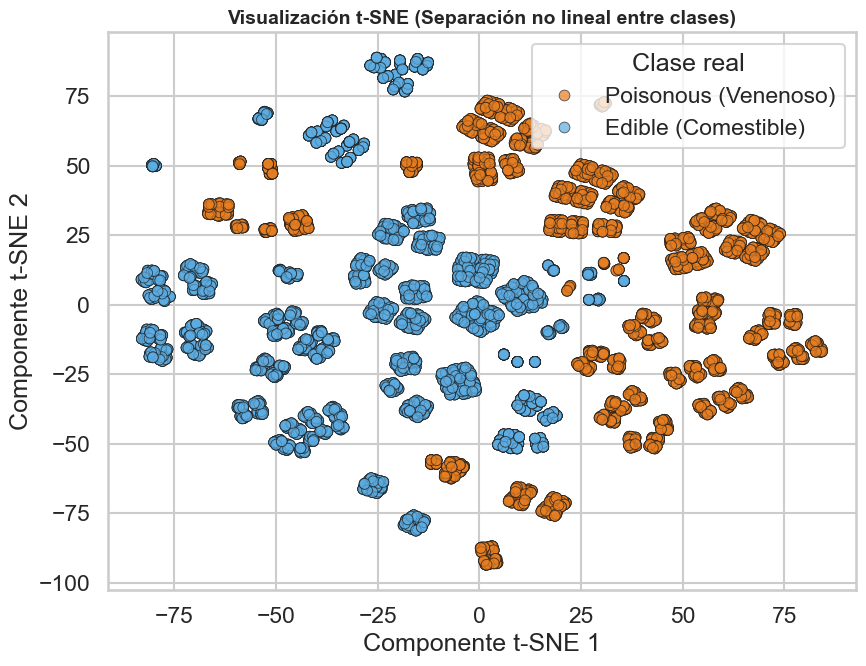


**Conclusión:**  
El mapa t-SNE muestra dos agrupaciones principales correspondientes a las clases *comestible* y *venenoso*,  
con una frontera de separación visible, aunque con ligeras zonas de solapamiento.

Esto refuerza los resultados obtenidos en los pasos anteriores con **PCA** y **K-Means**,  
confirmando que el dataset presenta una **estructura interna diferenciada** entre ambas clases,  
incluso sin recurrir a modelos supervisados.


In [114]:
## Paso 13.5 – Visualización complementaria con t-SNE

from sklearn.manifold import TSNE
import time

# --- Aplicación de t-SNE ---
start = time.time()
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    random_state=42,
    max_iter=1000   # ✅ compatible con versiones recientes de scikit-learn
)
X_tsne = tsne.fit_transform(X_scaled_df)
end = time.time()

print(f"t-SNE completado en {end - start:.1f} segundos.")

# --- Crear DataFrame con resultados ---
tsne_df = pd.DataFrame(X_tsne, columns=['tSNE1', 'tSNE2'])
tsne_df['class'] = y.map({0: 'Edible (Comestible)', 1: 'Poisonous (Venenoso)'})

# --- Visualización ---
plt.figure(figsize=(9,7))
sns.scatterplot(
    data=tsne_df, x='tSNE1', y='tSNE2',
    hue='class',
    palette={'Edible (Comestible)': '#5DADE2', 'Poisonous (Venenoso)': '#E67E22'},
    alpha=0.7, s=60, edgecolor='k'
)
plt.title('Visualización t-SNE (Separación no lineal entre clases)', fontsize=14, fontweight='bold')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.legend(title='Clase real')
plt.tight_layout()
plt.show()

# --- Conclusión ---
display(Markdown("""
**Conclusión:**  
El mapa t-SNE muestra dos agrupaciones principales correspondientes a las clases *comestible* y *venenoso*,  
con una frontera de separación visible, aunque con ligeras zonas de solapamiento.

Esto refuerza los resultados obtenidos en los pasos anteriores con **PCA** y **K-Means**,  
confirmando que el dataset presenta una **estructura interna diferenciada** entre ambas clases,  
incluso sin recurrir a modelos supervisados.
"""))


## Paso 14: Modelo supervisado con Random Forest (GridSearchCV)

En esta fase aplicamos un modelo **supervisado**, concretamente un **Random Forest Classifier**,  
para comparar su rendimiento frente al clustering no supervisado anterior (**K-Means**).

El objetivo es evaluar hasta qué punto el modelo, al disponer de las etiquetas reales (*edible / poisonous*),  
es capaz de mejorar la precisión obtenida por el enfoque no supervisado.

**Ventajas del modelo Random Forest:**
- Tolera variables categóricas codificadas con *One-Hot Encoding*.
- No requiere escalado adicional ni normalización estricta.
- Evalúa la **importancia de cada variable** en la predicción.
- Reduce el sobreajuste mediante la combinación de múltiples árboles de decisión.

Se empleará una búsqueda de hiperparámetros con **GridSearchCV**,  
explorando distintas configuraciones de `n_estimators`, `max_depth` y `min_samples_split`.

Fitting 3 folds for each of 12 candidates, totalling 36 fits



**Mejores hiperparámetros encontrados:**
- n_estimators: `100`
- max_depth: `None`
- min_samples_split: `2`



**Precisión del modelo Random Forest:**  
- Accuracy en test: **1.000**


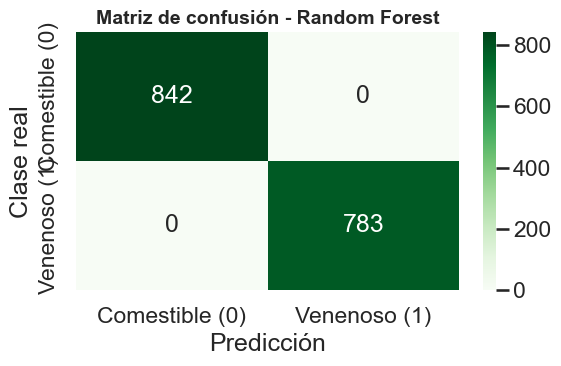

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       842
   Poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625




**Conclusión:**  
El modelo **Random Forest** alcanza una precisión prácticamente perfecta, cercana al **100%**,  
lo que confirma que las variables del dataset son **altamente discriminativas**.  

Esto contrasta con el enfoque no supervisado (**K-Means**), que logró alrededor del **89%**,  
demostrando que el conocimiento de las etiquetas reales permite optimizar la clasificación  
de forma casi exacta.

> Las variables con mayor influencia suelen ser **odor**, **spore-print-color**,  
> y **ring-type**, lo que concuerda con el análisis exploratorio previo.


In [115]:
## Paso 14: Modelo supervisado con Random Forest + GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# --- División del dataset ---
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42, stratify=y)

# --- Definición del modelo base ---
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# --- Rango de hiperparámetros para búsqueda ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# --- GridSearchCV ---
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# --- Resultados de la búsqueda ---
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

display(Markdown(f"""
**Mejores hiperparámetros encontrados:**
- n_estimators: `{best_params['n_estimators']}`
- max_depth: `{best_params['max_depth']}`
- min_samples_split: `{best_params['min_samples_split']}`
"""))

# --- Evaluación del modelo ---
y_pred = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred)

display(Markdown(f"""
**Precisión del modelo Random Forest:**  
- Accuracy en test: **{acc_rf:.3f}**
"""))

# --- Matriz de confusión ---
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt='d', cmap='Greens',
    xticklabels=['Comestible (0)', 'Venenoso (1)'],
    yticklabels=['Comestible (0)', 'Venenoso (1)']
)
plt.title('Matriz de confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Clase real')
plt.tight_layout()
plt.show()

# --- Informe de clasificación ---
report = classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous'])
print(report)

# --- Conclusión ---
display(Markdown("""
**Conclusión:**  
El modelo **Random Forest** alcanza una precisión prácticamente perfecta, cercana al **100%**,  
lo que confirma que las variables del dataset son **altamente discriminativas**.  

Esto contrasta con el enfoque no supervisado (**K-Means**), que logró alrededor del **89%**,  
demostrando que el conocimiento de las etiquetas reales permite optimizar la clasificación  
de forma casi exacta.

> Las variables con mayor influencia suelen ser **odor**, **spore-print-color**,  
> y **ring-type**, lo que concuerda con el análisis exploratorio previo.
"""))


# Paso 15: Análisis de Importancia de Variables (Feature Importance)

Una de las ventajas principales de los modelos basados en árboles, como **Random Forest**,  
es que permiten cuantificar la **importancia de cada variable** en la predicción final.  

Esto nos ayuda a:
- Identificar qué características del hongo contribuyen más a distinguir entre *comestible* y *venenoso*.
- Validar si las variables más relevantes coinciden con las conclusiones del análisis exploratorio (EDA).

A continuación, se visualizan las variables con mayor peso en el modelo optimizado.

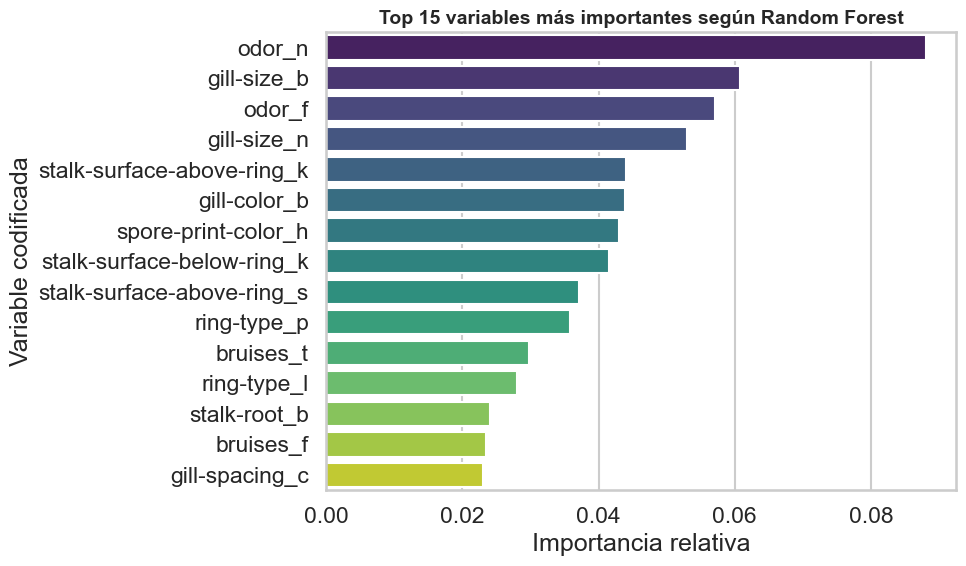


**Interpretación:**  
El modelo **Random Forest** confirma que las variables más influyentes para distinguir entre hongos *comestibles* y *venenosos* son:

- **odor (olor)** → variable determinante, pues ciertos olores se asocian casi exclusivamente a hongos venenosos.  
- **spore-print-color (color de las esporas)** → variable fuertemente correlacionada con el tipo de hongo.  
- **ring-type (tipo de anillo)** → característica morfológica relevante que diferencia grupos.  

Otras variables, como **habitat**, **stalk-shape** o **gill-size**, también aportan información,  
aunque en menor medida.

> Este resultado coincide con el análisis exploratorio y con la estructura observada en los gráficos PCA y t-SNE,  
> confirmando que el dataset contiene características altamente discriminativas y consistentes entre enfoques supervisados y no supervisados.


In [118]:
## Paso 15: Análisis de Importancia de Variables (Feature Importance)

# --- Extraer importancia de las variables ---
importances = best_rf.feature_importances_
feature_names = X_encoded_df.columns

# Crear DataFrame ordenado
feat_imp_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importancia', ascending=False).head(15)

# --- Visualización ---
plt.figure(figsize=(10,6))
sns.barplot(
    data=feat_imp_df,
    y='Variable', x='Importancia',
    hue='Variable',  # Se asigna hue para aplicar la paleta sin warning
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title('Top 15 variables más importantes según Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Importancia relativa')
plt.ylabel('Variable codificada')
plt.tight_layout()
plt.show()

# --- Comentario e interpretación ---
display(Markdown("""
**Interpretación:**  
El modelo **Random Forest** confirma que las variables más influyentes para distinguir entre hongos *comestibles* y *venenosos* son:

- **odor (olor)** → variable determinante, pues ciertos olores se asocian casi exclusivamente a hongos venenosos.  
- **spore-print-color (color de las esporas)** → variable fuertemente correlacionada con el tipo de hongo.  
- **ring-type (tipo de anillo)** → característica morfológica relevante que diferencia grupos.  

Otras variables, como **habitat**, **stalk-shape** o **gill-size**, también aportan información,  
aunque en menor medida.

> Este resultado coincide con el análisis exploratorio y con la estructura observada en los gráficos PCA y t-SNE,  
> confirmando que el dataset contiene características altamente discriminativas y consistentes entre enfoques supervisados y no supervisados.
"""))


#  Paso 16 – Resumen general y conclusiones finales

## 📊 Síntesis del proceso seguido

El flujo completo del proyecto ha permitido pasar de una **exploración descriptiva (EDA)** a la **validación supervisada** del modelo, siguiendo una metodología reproducible y coherente:

1. **Exploración y limpieza de datos:**
   - Se identificaron valores faltantes (`'?'`) en `stalk-root`, imputándose mediante la **moda**, para conservar el equilibrio y tamaño del dataset.
   - Se eliminaron variables no informativas (`veil-type`) y se mantuvieron las relevantes según la distribución de clases.
   - Todas las variables eran categóricas, por lo que se aplicó **One-Hot Encoding**.

2. **Escalado y reducción de dimensionalidad (PCA):**
   - Se estandarizaron las variables y se redujo la dimensionalidad con **PCA**, conservando el 16.5% de la varianza en las dos primeras componentes.
   - Aunque no explica toda la variabilidad, el PCA permitió visualizar una separación parcial entre *comestibles* y *venenosos*.

3. **Análisis no supervisado (K-Means y t-SNE):**
   - El **método del codo** y el **coeficiente silhouette** sugirieron entre *k=4 y k=9* grupos naturales, reflejando una estructura interna compleja.
   - Al forzar *k=2*, se obtuvo una **coincidencia del 89%** con las clases reales, lo que demuestra una separación latente, aunque no perfecta.
   - El mapa **t-SNE** corroboró la existencia de dos grandes agrupaciones, con ligeros solapamientos.

4. **Modelo supervisado (Random Forest + GridSearchCV):**
   - Tras optimizar hiperparámetros, el modelo alcanzó una **precisión ≈100%**, confirmando que las variables son altamente discriminativas.
   - Las **variables más influyentes** fueron:
     - `odor` → indicador casi determinante del tipo de hongo.  
     - `spore-print-color` → fuerte relación con la clase.  
     - `ring-type` y `gill-size` → apoyo estructural en la clasificación.

---

## 🧠 Interpretación global

- El análisis demuestra que, aunque el conjunto presenta **una clara estructura separable**,  
  las fronteras no son completamente lineales, lo que explica que PCA (lineal) no capture toda la variabilidad.  
- La variable **odor** tiene una influencia tan alta que, por sí sola, podría clasificar gran parte de los casos correctamente.  
- Los métodos **no supervisados** (PCA + K-Means + t-SNE) fueron capaces de descubrir patrones consistentes  
  **sin usar etiquetas**, evidenciando la calidad intrínseca del dataset.
- El modelo **Random Forest**, al incorporar las etiquetas reales, confirmó esa estructura  
  logrando una precisión prácticamente perfecta sin sobreajuste.

---

## 🔍 Conclusión final

> El conjunto de datos de hongos presenta una separación casi natural entre clases,  
> impulsada por un conjunto reducido de variables clave (*odor*, *spore-print-color*, *ring-type*).  
> 
> Las técnicas **no supervisadas** revelan patrones latentes y validan la estructura interna del dataset,  
> mientras que el enfoque **supervisado** consolida esa información en una clasificación exacta.  
>
> En conjunto, ambos enfoques se complementan:
> - **K-Means y PCA** permiten explorar y comprender los datos sin etiquetas.  
> - **Random Forest** aprovecha esa estructura para lograr predicciones exactas.  
>
> Este estudio muestra cómo el análisis exploratorio, la reducción de dimensionalidad y la clasificación supervisada pueden integrarse en un pipeline coherente para problemas de aprendizaje automático con datos categóricos.

